## New Physics: Finite Temperature

A nice way to model a classical system in contact with a heat bath (lets say a molecule in solvent) is to add a friction term $\gamma$ and also a noise term $\Gamma(t)$ which represents energy given to the system by random collisions with the solvent molecules. $\Gamma(t)$ is a random number drawn from a normal distribution with standard deviation $\sigma=1$ and mean $\mu=0$.


$$
m\frac{\partial^2 y}{\partial t^2}(t) = -ky -\gamma \frac{\partial y}{\partial t}(t) + \Gamma (t)\,\sqrt{2\gamma k_B T / \delta} 
$$

As temperature goes up, you can see that the collisions become more strong.  For larger timestep $\delta$, we are averaging the collisions over a longer interval so the total force over the interval will most likely be closer to zero.  Therefore the correct force to apply depends on the integration step that is being used.  We can call this 'Langevin Dynamics', after Marie Curie's theorist boyfriend, Paul Langevin.





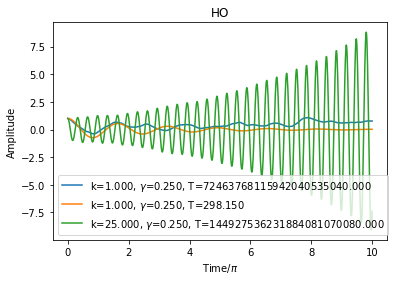

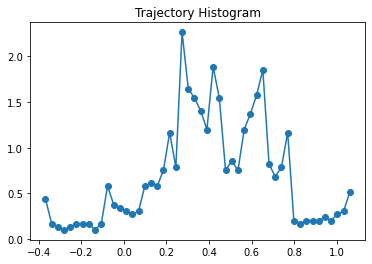

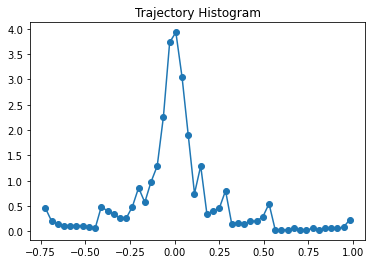

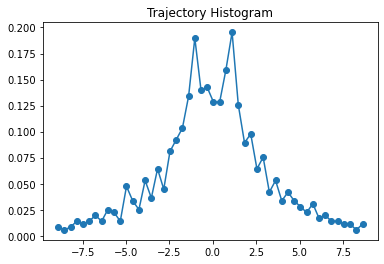

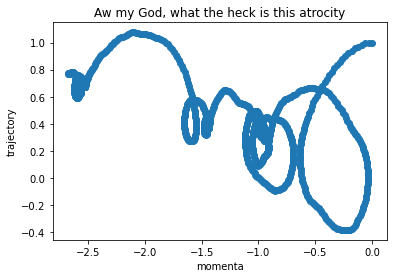

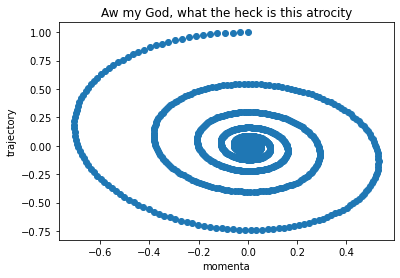

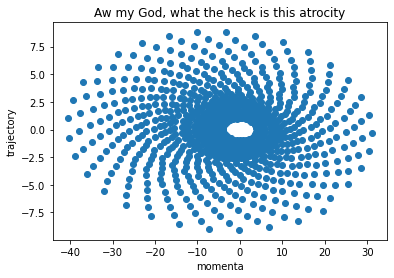

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

class HO():
    def __init__(self, k=1., A=1., m=1., gamma=0., T=298.15, G=0.):
        
        ##save input variables
        self.k     = k ## some constant
        self.A     = A ## seems to be the starting point / starting amplitude
        self.m     = m ## another constant
        self.gamma = gamma ## breaking factor
        self.T     = T ## temperature
        self.normalDist = np.random.normal( size = (1000))
        self.Gamma = G
        
        ##save some internal state
        self.y = A ## still the starting point
        self.t = 0. ## starting time
        self.p = 0. ## starting momentum (== velocity?)
        self.a = 0. ## let's add some acceleration for verlet
        
        ##save my history
        self.trajectory = [self.y]
        self.timepoints = [self.t]
        self.momenta    = [self.p]
        self.accelerations = [self.a]
    
    def step_t(self, dt):
        
        """
        This is an incomplete/non-optimal integration 
        timestep function.
        """

        self.t  = self.t + dt ## increase the time interval we're in
        
        #########################################
        ##sloppy/easy Euler integration method
        yPrev   = self.y
        
        randomIndex = random.randrange(len(self.normalDist))
        self.Gamma = self.normalDist[randomIndex]
        
        self.a -= self.k * yPrev
        self.a -= self.gamma * self.p 
        self.a += self.Gamma * np.sqrt(2 * self.gamma * cstBoltzmann * self.T / dt)  ## calculate the acceleration term
        self.a /= self.m
        
        self.y += dt * self.p
        self.y += 0.5 * dt**2 * self.a
        
        ##at least making an effort to do central difference in the force calc.
        yMid    = 0.5*(yPrev + self.y) ##avg between current and next position
        fMid    = -self.k * yMid ## just ky
        self.p += dt * (fMid - self.gamma*self.p) 
        ######################################### 
    
        self.timepoints.append(self.t)
        self.trajectory.append(self.y)
        self.momenta.append(self.p)
        
    def addToPlot(self):
        plt.plot(np.array(self.timepoints)/np.pi, self.trajectory, label="k=%.3f, $\gamma$=%.3f, T=%.3f"%(self.k,self.gamma,self.T))
    
    def makeHistogram(self, N): ## just took over the example code
        bins, edges = np.histogram(self.trajectory, bins = N, density = True)
        centres = 0.5*(edges[0:len(edges)-1] + edges[1:])
        
        plt.plot(centres, bins, '-o')
        plt.title("Trajectory Histogram")
        plt.show()
        
    def makeScatter(self):
        plt.scatter(self.momenta,self.trajectory) ## plt.scatter(self.momenta[::10],self.trajectory[::10])
        plt.title("Aw my God, what the heck is this atrocity")
        plt.xlabel("momenta")
        plt.ylabel("trajectory")
        plt.show()
        
cstBoltzmann = 1.38 * 10**(-23)

## looking at different outcomes for different temperatures
N = 1000

ho3 = HO(k=1, gamma=0.25, T= 1 / cstBoltzmann)
for i in range(N):
    ho3.step_t(0.01*np.pi)
ho3.addToPlot()

ho4 = HO(k=1, gamma=0.25)
for i in range(N):
    ho4.step_t(0.01*np.pi)
ho4.addToPlot()

ho5 = HO(k=25, gamma=0.25, T= 2 / cstBoltzmann)
for i in range(N):
    ho5.step_t(0.01*np.pi)
ho5.addToPlot()


plt.title("HO")
plt.xlabel("Time/$\pi$")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

## histogram with 50 bins
ho3.makeHistogram(50) 
ho4.makeHistogram(50) 
ho5.makeHistogram(50) 

## scatter plots of trajectory as funnction of momenta
ho3.makeScatter()
ho4.makeScatter()
ho5.makeScatter()